In [2]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import easyocr 
import imutils

In [3]:
def Extract_Num(image):
    global img, approx
#     img = cv2.imread(filename)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #noise reduction 
    edged = cv2.Canny(bfilter, 30,200) # edge detection 
    
    keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location =None 
    for contour in contours:
        approx = cv2.approxPolyDP(contour,10,True)
        if len(approx) == 4:
            location =approx
            break 
    mask = np.zeros(gray.shape, np.uint8)
    new_img = cv2.drawContours(mask, [location], 0,255, -1)
    new_img = cv2.bitwise_and(image,image, mask=mask)

    (x,y) = np.where(mask==255)
    (x1,y1) = (np.min(x), np.min(y))
    (x2,y2) = (np.max(x),np.max(y))
    cropped_img = gray[x1:x2+1,y1:y2+1]
    return cropped_img


In [6]:
def Render_Result(filename):
    img = cv2.imread(filename)
    cropped_img = Extract_Num(img)
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_img)
    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX 
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60),fontFace=font, fontScale=1, color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]),tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


hh


C:\Users\pc\anaconda3\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


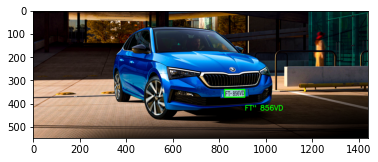

In [7]:
filename="car.png"
Render_Result(filename)

In [2]:
def Extract_from_video(filename):
    cap = cv2.VideoCapture(filename)
    while True:
        success , image = cap.read()  
        
#         cropped_img = Extract_Num(img)
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #noise reduction 
        edged = cv2.Canny(bfilter, 30,200) # edge detection 

        keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        contours = imutils.grab_contours(keypoints)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

        location =None 
        for contour in contours:
            approx = cv2.approxPolyDP(contour,10,True)
            if len(approx) == 4:
                location =approx
                break 
        mask = np.zeros(gray.shape, np.uint8)
        new_img = cv2.drawContours(mask, [location], 0,255, -1)
        new_img = cv2.bitwise_and(image,image, mask=mask)

        (x,y) = np.where(mask==255)
        (x1,y1) = (np.min(x), np.min(y))
        (x2,y2) = (np.max(x),np.max(y))
        cropped_img = gray[x1:x2+1,y1:y2+1]

# ------------------
        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_img)
        print(result)
        if len(result) > 0:
            text = result[0][-2]
            font = cv2.FONT_HERSHEY_SIMPLEX 
            res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60),fontFace=font, fontScale=1, color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
            res = cv2.rectangle(image, tuple(approx[0][0]),tuple(approx[2][0]), (0,255,0),3)
    
        cv2.imshow("image",image)
        if cv2.waitKey(10) & 0xFF == ord("q"):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
filename = "licen2.mp4"
Extract_from_video(filename)